In [3]:
# 1.1 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
# 1.2 Configure plotting style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print("Plotting style configured successfully!")
print(f"Default figure size: {plt.rcParams['figure.figsize']}")
# 1.3 Define file paths
# Set up data folder path
data_folder = Path(r'c:\Users\iis22\Desktop\netherlands-rent-analysis\data')

# Define specific file paths for both datasets
rent_file = data_folder / 'Rent_increase_dwellings__region_24112025_140230.csv'
stock_file = data_folder / 'Dwellings_and_non_residential_stock__2012_2025_24112025_135821.csv'

# Create figures folder if it doesn't exist
figures_folder = Path(r'c:\Users\iis22\Desktop\netherlands-rent-analysis\figures')
figures_folder.mkdir(parents=True, exist_ok=True)

# Verify paths exist
print("File paths configured successfully!")
print(f"\nData folder: {data_folder}")
print(f"Data folder exists: {data_folder.exists()}")
print(f"\nRent increase file: {rent_file.name}")
print(f"Rent file exists: {rent_file.exists()}")
print(f"\nStock file: {stock_file.name}")
print(f"Stock file exists: {stock_file.exists()}")
print(f"\nFigures folder: {figures_folder}")
print(f"Figures folder exists: {figures_folder.exists()}")

Libraries imported successfully!
Pandas version: 2.2.3
NumPy version: 2.1.3
Plotting style configured successfully!
Default figure size: [12.0, 6.0]
File paths configured successfully!

Data folder: c:\Users\iis22\Desktop\netherlands-rent-analysis\data
Data folder exists: True

Rent increase file: Rent_increase_dwellings__region_24112025_140230.csv
Rent file exists: True

Stock file: Dwellings_and_non_residential_stock__2012_2025_24112025_135821.csv
Stock file exists: True

Figures folder: c:\Users\iis22\Desktop\netherlands-rent-analysis\figures
Figures folder exists: True


In [6]:
# 2.1 Load Rent Increase Dataset
print("="*70)
print("STEP 2: LOADING DATASETS")
print("="*70)

# Load rent increase data
# Note: This file has 3 header rows that need to be handled
df_rent_raw = pd.read_csv(rent_file, encoding='utf-8')

print("\n2.1 Rent Increase Dataset Loaded")
print(f"Shape: {df_rent_raw.shape}")
print(f"\nColumn names:")
print(df_rent_raw.columns.tolist())
print(f"\nFirst 10 rows:")
print(df_rent_raw.head(10))
# 2.2 Reload Rent Increase Dataset with correct parameters
# The file uses semicolon as delimiter and has 3 header rows to skip
df_rent_raw = pd.read_csv(rent_file, 
                          sep=';', 
                          skiprows=3,
                          encoding='utf-8')

print("\n2.2 Rent Increase Dataset Reloaded with Correct Parameters")
print(f"Shape: {df_rent_raw.shape}")
print(f"\nColumn names:")
print(df_rent_raw.columns.tolist())
print(f"\nFirst 15 rows:")
print(df_rent_raw.head(15))
print(f"\nData types:")
print(df_rent_raw.dtypes)
print(f"\nLast 5 rows:")
print(df_rent_raw.tail())
# 2.3 Load Housing Stock Dataset
# This file also uses semicolon delimiter and has multiple header rows
df_stock_raw = pd.read_csv(stock_file, 
                           sep=';', 
                           skiprows=3,
                           encoding='utf-8')

print("\n2.3 Housing Stock Dataset Loaded")
print(f"Shape: {df_stock_raw.shape}")
print(f"\nColumn names:")
print(df_stock_raw.columns.tolist())
print(f"\nFirst 10 rows:")
print(df_stock_raw.head(10))
print(f"\nData types:")
print(df_stock_raw.dtypes)
print(f"\nLast 5 rows:")
print(df_stock_raw.tail())

STEP 2: LOADING DATASETS

2.1 Rent Increase Dataset Loaded
Shape: (60, 1)

Column names:
['Rent increase dwellings; region']

First 10 rows:
                     Rent increase dwellings; region
0                                                NaN
1                                        ;"";"Topic"
2  ;"";"Rent increase including harmonisation";"R...
3                          Regions;"Periods";"%";"%"
4                 The Netherlands;"2015";"2.4";"1.9"
5                 The Netherlands;"2016";"1.9";"1.4"
6                 The Netherlands;"2017";"1.6";"1.2"
7                 The Netherlands;"2018";"2.3";"1.8"
8                 The Netherlands;"2019";"2.5";"2.1"
9                 The Netherlands;"2020";"2.9";"2.4"

2.2 Rent Increase Dataset Reloaded with Correct Parameters
Shape: (57, 4)

Column names:
['Unnamed: 0', 'Unnamed: 1', 'Rent increase including harmonisation', 'Rent increase excluding harmonisation']

First 15 rows:
         Unnamed: 0 Unnamed: 1 Rent increase including harm

In [12]:
# 3.1 Clean Rent Increase Dataset - Remove footer row
print("\n" + "="*70)
print("STEP 3: DATA CLEANING")
print("="*70)

# Check if last row contains "Source: CBS"
print("\n3.1 Cleaning Rent Increase Dataset")
print(f"Original shape: {df_rent_raw.shape}")
print(f"\nLast row before cleaning:")
print(df_rent_raw.tail(1))

# Remove the last row if it contains "Source" or is NaN
if df_rent_raw.iloc[-1].isna().any() or 'Source' in str(df_rent_raw.iloc[-1, 0]):
    df_rent = df_rent_raw.iloc[:-1].copy()
    print(f"\nRemoved footer row")
else:
    df_rent = df_rent_raw.copy()
    print(f"\nNo footer row to remove")

print(f"New shape: {df_rent.shape}")
print(f"\nLast row after cleaning:")
print(df_rent.tail(1))
# 3.2 Rename columns for better readability
print("\n3.2 Renaming Columns")
print(f"Original column names:")
print(df_rent.columns.tolist())

# Rename columns to more meaningful names
df_rent.columns = ['Region', 'Year', 'Rent_Increase_With_Harmonisation', 'Rent_Increase_Without_Harmonisation']

print(f"\nNew column names:")
print(df_rent.columns.tolist())
print(f"\nFirst 5 rows with new column names:")
print(df_rent.head())
# 3.3 Remove header row and convert data types
print("\n3.3 Removing Header Row and Converting Data Types")
print(f"Shape before: {df_rent.shape}")
print(f"First row (header to remove):")
print(df_rent.iloc[0])

# Remove the first row (old headers)
df_rent = df_rent.iloc[1:].reset_index(drop=True)

print(f"\nShape after removing header: {df_rent.shape}")
print(f"\nFirst 5 rows after removal:")
print(df_rent.head())

# Check data types before conversion
print(f"\nData types before conversion:")
print(df_rent.dtypes)

# Convert Year to integer
df_rent['Year'] = df_rent['Year'].astype(int)

# Convert rent increase columns to float
df_rent['Rent_Increase_With_Harmonisation'] = df_rent['Rent_Increase_With_Harmonisation'].astype(float)
df_rent['Rent_Increase_Without_Harmonisation'] = df_rent['Rent_Increase_Without_Harmonisation'].astype(float)

print(f"\nData types after conversion:")
print(df_rent.dtypes)

print(f"\nFirst 10 rows after conversion:")
print(df_rent.head(10))

print(f"\nBasic statistics:")
print(df_rent.describe())
# 3.4 Clean Housing Stock Dataset
print("\n3.4 Cleaning Housing Stock Dataset")
print(f"Original shape: {df_stock_raw.shape}")
print(f"\nLast row:")
print(df_stock_raw.tail(1))

# Remove footer row if it exists
if df_stock_raw.iloc[-1].isna().any() or 'Source' in str(df_stock_raw.iloc[-1, 0]):
    df_stock = df_stock_raw.iloc[:-1].copy()
    print(f"\nRemoved footer row")
else:
    df_stock = df_stock_raw.copy()
    print(f"\nNo footer row to remove")

print(f"New shape: {df_stock.shape}")

# Check first few rows to understand structure
print(f"\nFirst 5 rows:")
print(df_stock.head())

# Check column names
print(f"\nColumn names ({len(df_stock.columns)} total):")
for i, col in enumerate(df_stock.columns):
    print(f"{i}: {col}")
    # 3.5 Restructure Housing Stock Dataset - Focus on Housing Function
print("\n3.5 Restructuring Housing Stock Dataset")

# First, remove the first row (contains "Topic", "Initial stock", etc.)
df_stock = df_stock.iloc[1:].reset_index(drop=True)

print(f"Shape after removing first row: {df_stock.shape}")
print(f"\nFirst row (should be 'Regions', 'Periods', 'number'...):")
print(df_stock.iloc[0])

# Remove this header row too
df_stock = df_stock.iloc[1:].reset_index(drop=True)

print(f"\nShape after removing second header row: {df_stock.shape}")
print(f"\nFirst 5 rows:")
print(df_stock.head())

# Select only the columns we need:
# - Region (Unnamed: 0)
# - Year (Purpose)
# - Housing function columns (indices 10-17)
columns_to_keep = [0, 1] + list(range(10, 18))

df_stock_selected = df_stock.iloc[:, columns_to_keep].copy()

print(f"\nSelected columns shape: {df_stock_selected.shape}")
print(f"\nSelected columns:")
print(df_stock_selected.columns.tolist())
print(f"\nFirst 5 rows of selected data:")
print(df_stock_selected.head())
# 3.6 Rename columns and convert data types for Housing Stock
print("\n3.6 Renaming Columns and Converting Data Types")

# Rename columns to meaningful names
df_stock_selected.columns = [
    'Region', 
    'Year', 
    'Initial_Stock',
    'New_Construction',
    'Other_Additions',
    'Demolition',
    'Other_Withdrawals',
    'Corrections',
    'Stock_Balance',
    'Final_Stock'
]

print(f"New column names:")
print(df_stock_selected.columns.tolist())
print(f"\nFirst 5 rows with new names:")
print(df_stock_selected.head())

# Check data types before conversion
print(f"\nData types before conversion:")
print(df_stock_selected.dtypes)

# Convert Year to integer
df_stock_selected['Year'] = df_stock_selected['Year'].astype(int)

# Convert numeric columns - need to handle comma as decimal separator
numeric_columns = [
    'Initial_Stock', 'New_Construction', 'Other_Additions', 
    'Demolition', 'Other_Withdrawals', 'Corrections', 
    'Stock_Balance', 'Final_Stock'
]

for col in numeric_columns:
    # Replace comma with empty string (it's used as thousands separator)
    df_stock_selected[col] = df_stock_selected[col].str.replace(',', '')
    # Convert to integer
    df_stock_selected[col] = df_stock_selected[col].astype(int)

print(f"\nData types after conversion:")
print(df_stock_selected.dtypes)

print(f"\nFirst 10 rows after conversion:")
print(df_stock_selected.head(10))

print(f"\nBasic statistics:")
print(df_stock_selected.describe())

# Rename for consistency
df_stock = df_stock_selected.copy()

print(f"\nFinal shape: {df_stock.shape}")
print(f"\nUnique regions in stock data:")
print(df_stock['Region'].unique())


STEP 3: DATA CLEANING

3.1 Cleaning Rent Increase Dataset
Original shape: (57, 4)

Last row before cleaning:
     Unnamed: 0 Unnamed: 1 Rent increase including harmonisation  \
56  Source: CBS        NaN                                   NaN   

   Rent increase excluding harmonisation  
56                                   NaN  

Removed footer row
New shape: (56, 4)

Last row after cleaning:
                Unnamed: 0 Unnamed: 1 Rent increase including harmonisation  \
55  Utrecht (municipality)       2025                                   4.8   

   Rent increase excluding harmonisation  
55                                   4.2  

3.2 Renaming Columns
Original column names:
['Unnamed: 0', 'Unnamed: 1', 'Rent increase including harmonisation', 'Rent increase excluding harmonisation']

New column names:
['Region', 'Year', 'Rent_Increase_With_Harmonisation', 'Rent_Increase_Without_Harmonisation']

First 5 rows with new column names:
            Region     Year Rent_Increase_With_Harm

In [13]:

print("\n" + "="*70)
print("STEP 4: DATA VALIDATION")
print("="*70)

# 4.1 Check for missing values
print("\n4.1 Checking for Missing Values")
print("\nRent Increase Dataset:")
print(df_rent.isnull().sum())
print(f"\nTotal missing values: {df_rent.isnull().sum().sum()}")

print("\nHousing Stock Dataset:")
print(df_stock.isnull().sum())
print(f"\nTotal missing values: {df_stock.isnull().sum().sum()}")

# 4.2 Check data ranges
print("\n4.2 Checking Data Ranges")
print("\nRent Increase Dataset:")
print(f"Year range: {df_rent['Year'].min()} - {df_rent['Year'].max()}")
print(f"Rent increase (with harmonisation) range: {df_rent['Rent_Increase_With_Harmonisation'].min():.1f}% - {df_rent['Rent_Increase_With_Harmonisation'].max():.1f}%")
print(f"Rent increase (without harmonisation) range: {df_rent['Rent_Increase_Without_Harmonisation'].min():.1f}% - {df_rent['Rent_Increase_Without_Harmonisation'].max():.1f}%")

print("\nHousing Stock Dataset:")
print(f"Year range: {df_stock['Year'].min()} - {df_stock['Year'].max()}")
print(f"Initial stock range: {df_stock['Initial_Stock'].min():,} - {df_stock['Initial_Stock'].max():,}")
print(f"Final stock range: {df_stock['Final_Stock'].min():,} - {df_stock['Final_Stock'].max():,}")

# 4.3 Check unique regions
print("\n4.3 Checking Unique Regions")
print("\nRent Increase Dataset:")
print(f"Number of unique regions: {df_rent['Region'].nunique()}")
print(f"Regions: {sorted(df_rent['Region'].unique())}")

print("\nHousing Stock Dataset:")
print(f"Number of unique regions: {df_stock['Region'].nunique()}")
print(f"Regions: {sorted(df_stock['Region'].unique())}")

# 4.4 Check common regions
print("\n4.4 Checking Common Regions")
rent_regions = set(df_rent['Region'].unique())
stock_regions = set(df_stock['Region'].unique())
common_regions = rent_regions.intersection(stock_regions)
print(f"\nCommon regions: {sorted(common_regions)}")
print(f"Number of common regions: {len(common_regions)}")

# 4.5 Check data completeness for each region
print("\n4.5 Checking Data Completeness by Region")
print("\nRent Increase Dataset - Records per region:")
print(df_rent.groupby('Region').size().sort_values(ascending=False))

print("\nHousing Stock Dataset - Records per region:")
print(df_stock.groupby('Region').size().sort_values(ascending=False))

# 4.6 Verify year coverage
print("\n4.6 Checking Year Coverage")
print("\nRent Increase Dataset - Years per region:")
for region in sorted(df_rent['Region'].unique()):
    years = sorted(df_rent[df_rent['Region'] == region]['Year'].unique())
    print(f"{region}: {years[0]}-{years[-1]} ({len(years)} years)")

print("\nHousing Stock Dataset - Years per region:")
for region in sorted(df_stock['Region'].unique()):
    years = sorted(df_stock[df_stock['Region'] == region]['Year'].unique())
    print(f"{region}: {years[0]}-{years[-1]} ({len(years)} years)")

print("\n" + "="*70)
print("DATA VALIDATION COMPLETE")
print("="*70)


STEP 4: DATA VALIDATION

4.1 Checking for Missing Values

Rent Increase Dataset:
Region                                 0
Year                                   0
Rent_Increase_With_Harmonisation       0
Rent_Increase_Without_Harmonisation    0
dtype: int64

Total missing values: 0

Housing Stock Dataset:
Region               0
Year                 0
Initial_Stock        0
New_Construction     0
Other_Additions      0
Demolition           0
Other_Withdrawals    0
Corrections          0
Stock_Balance        0
Final_Stock          0
dtype: int64

Total missing values: 0

4.2 Checking Data Ranges

Rent Increase Dataset:
Year range: 2015 - 2025
Rent increase (with harmonisation) range: 0.8% - 5.9%
Rent increase (without harmonisation) range: 0.2% - 4.9%

Housing Stock Dataset:
Year range: 2015 - 2024
Initial stock range: 147,511 - 8,204,049
Final stock range: 149,322 - 8,274,478

4.3 Checking Unique Regions

Rent Increase Dataset:
Number of unique regions: 5
Regions: ["'s-Gravenhage (muni

In [14]:

print("\n" + "="*70)
print("STEP 5: EXPLORATORY DATA ANALYSIS (EDA)")
print("="*70)

# 5.1 Analyze Rent Increase Trends
print("\n5.1 Analyzing Rent Increase Trends")

# Calculate average rent increase by region
print("\nAverage Rent Increase by Region (2015-2025):")
avg_rent_by_region = df_rent.groupby('Region')[['Rent_Increase_With_Harmonisation', 
                                                  'Rent_Increase_Without_Harmonisation']].mean()
avg_rent_by_region = avg_rent_by_region.sort_values('Rent_Increase_With_Harmonisation', ascending=False)
print(avg_rent_by_region.round(2))

# Calculate average rent increase by year (national level)
print("\nAverage Rent Increase by Year (National Level):")
national_rent = df_rent[df_rent['Region'] == 'The Netherlands'][['Year', 
                                                                   'Rent_Increase_With_Harmonisation',
                                                                   'Rent_Increase_Without_Harmonisation']]
print(national_rent)

# 5.2 Analyze Housing Stock Trends
print("\n5.2 Analyzing Housing Stock Trends")

# Calculate net change in housing stock by region
print("\nNet Housing Stock Change by Region (2015-2024):")
stock_change = df_stock.groupby('Region').agg({
    'Initial_Stock': 'first',
    'Final_Stock': 'last',
    'New_Construction': 'sum',
    'Demolition': 'sum'
})
stock_change['Net_Change'] = stock_change['Final_Stock'] - stock_change['Initial_Stock']
stock_change['Growth_Rate_%'] = (stock_change['Net_Change'] / stock_change['Initial_Stock'] * 100).round(2)
stock_change = stock_change.sort_values('Growth_Rate_%', ascending=False)
print(stock_change)

# 5.3 Analyze Construction vs Demolition
print("\n5.3 Analyzing Construction vs Demolition")

# Calculate construction to demolition ratio
print("\nConstruction to Demolition Ratio by Region:")
construction_ratio = df_stock.groupby('Region').agg({
    'New_Construction': 'sum',
    'Demolition': 'sum'
})
construction_ratio['Construction_to_Demolition_Ratio'] = (
    construction_ratio['New_Construction'] / construction_ratio['Demolition']
).round(2)
construction_ratio = construction_ratio.sort_values('Construction_to_Demolition_Ratio', ascending=False)
print(construction_ratio)

# 5.4 Year-over-Year Analysis
print("\n5.4 Year-over-Year Analysis")

# Calculate YoY change in rent increase (national)
print("\nYear-over-Year Change in Rent Increase (The Netherlands):")
national_rent_sorted = national_rent.sort_values('Year')
national_rent_sorted['YoY_Change_With_Harm'] = national_rent_sorted['Rent_Increase_With_Harmonisation'].diff()
national_rent_sorted['YoY_Change_Without_Harm'] = national_rent_sorted['Rent_Increase_Without_Harmonisation'].diff()
print(national_rent_sorted)

# 5.5 Identify Peak Years
print("\n5.5 Identifying Peak Years")

# Find years with highest rent increases
print("\nTop 5 Years with Highest Rent Increase (National):")
top_rent_years = national_rent.nlargest(5, 'Rent_Increase_With_Harmonisation')
print(top_rent_years)

# Find years with highest housing construction
print("\nTop 5 Years with Highest New Construction (National):")
national_stock = df_stock[df_stock['Region'] == 'The Netherlands'][['Year', 'New_Construction']]
top_construction_years = national_stock.nlargest(5, 'New_Construction')
print(top_construction_years)

print("\n" + "="*70)
print("EXPLORATORY DATA ANALYSIS COMPLETE")
print("="*70)


STEP 5: EXPLORATORY DATA ANALYSIS (EDA)

5.1 Analyzing Rent Increase Trends

Average Rent Increase by Region (2015-2025):
                              Rent_Increase_With_Harmonisation  \
Region                                                           
Amsterdam                                                 3.29   
Rotterdam                                                 3.16   
's-Gravenhage (municipality)                              2.88   
Utrecht (municipality)                                    2.83   
The Netherlands                                           2.70   

                              Rent_Increase_Without_Harmonisation  
Region                                                             
Amsterdam                                                    2.32  
Rotterdam                                                    2.30  
's-Gravenhage (municipality)                                 2.30  
Utrecht (municipality)                                       2.19  
The Ne


STEP 6: DATA VISUALIZATION

6.1 Creating Rent Increase Trends Visualization
Saved: c:\Users\iis22\Desktop\netherlands-rent-analysis\figures\rent_increase_trends.png


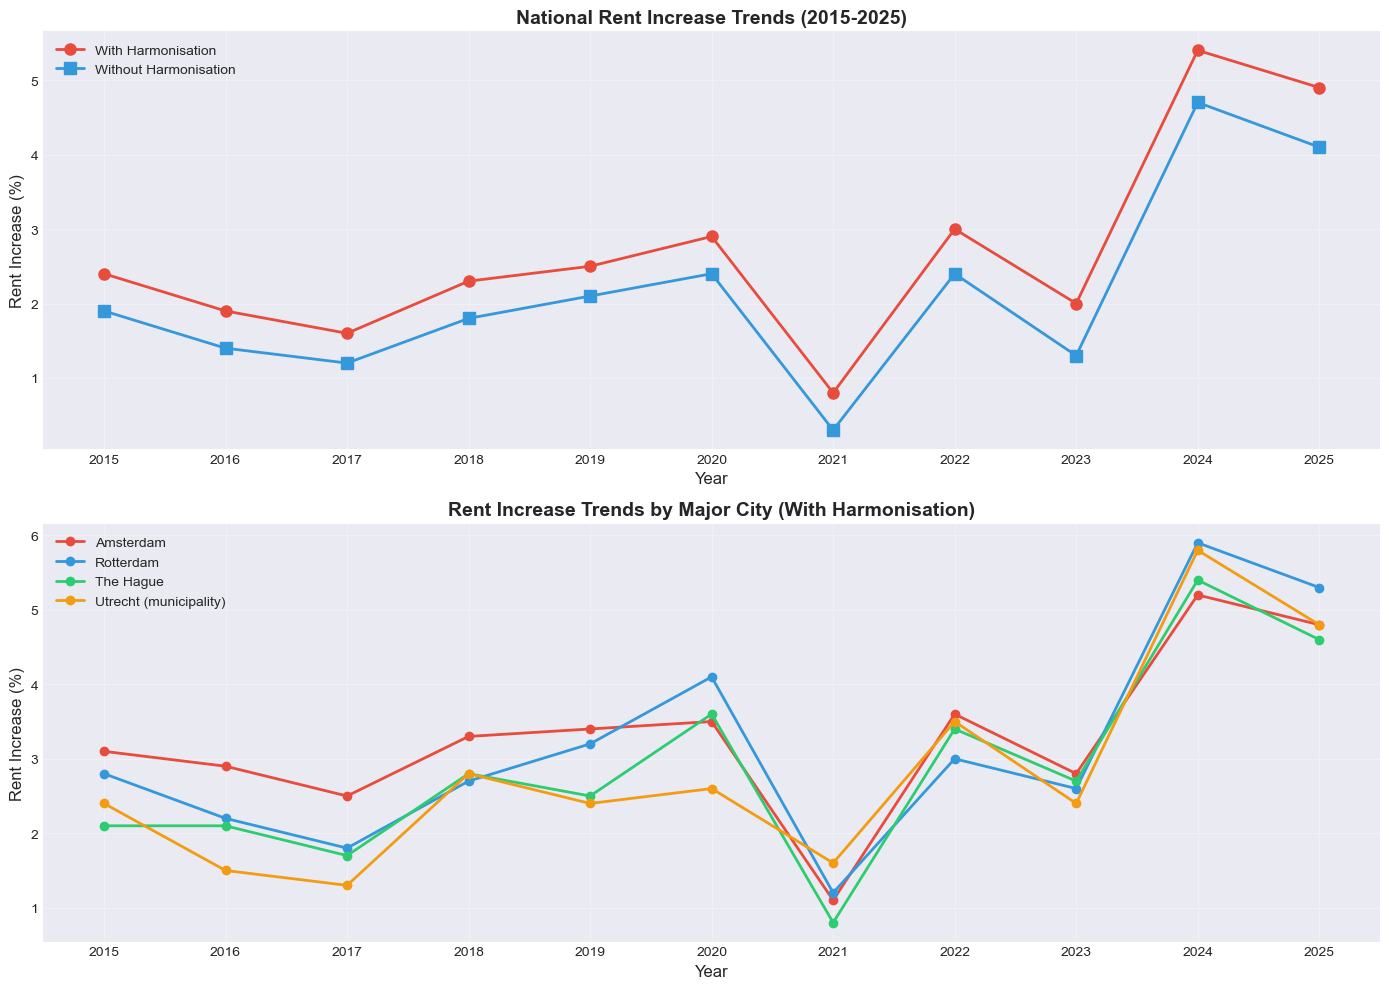


6.2 Creating Housing Stock Growth Visualization
Saved: c:\Users\iis22\Desktop\netherlands-rent-analysis\figures\housing_stock_analysis.png


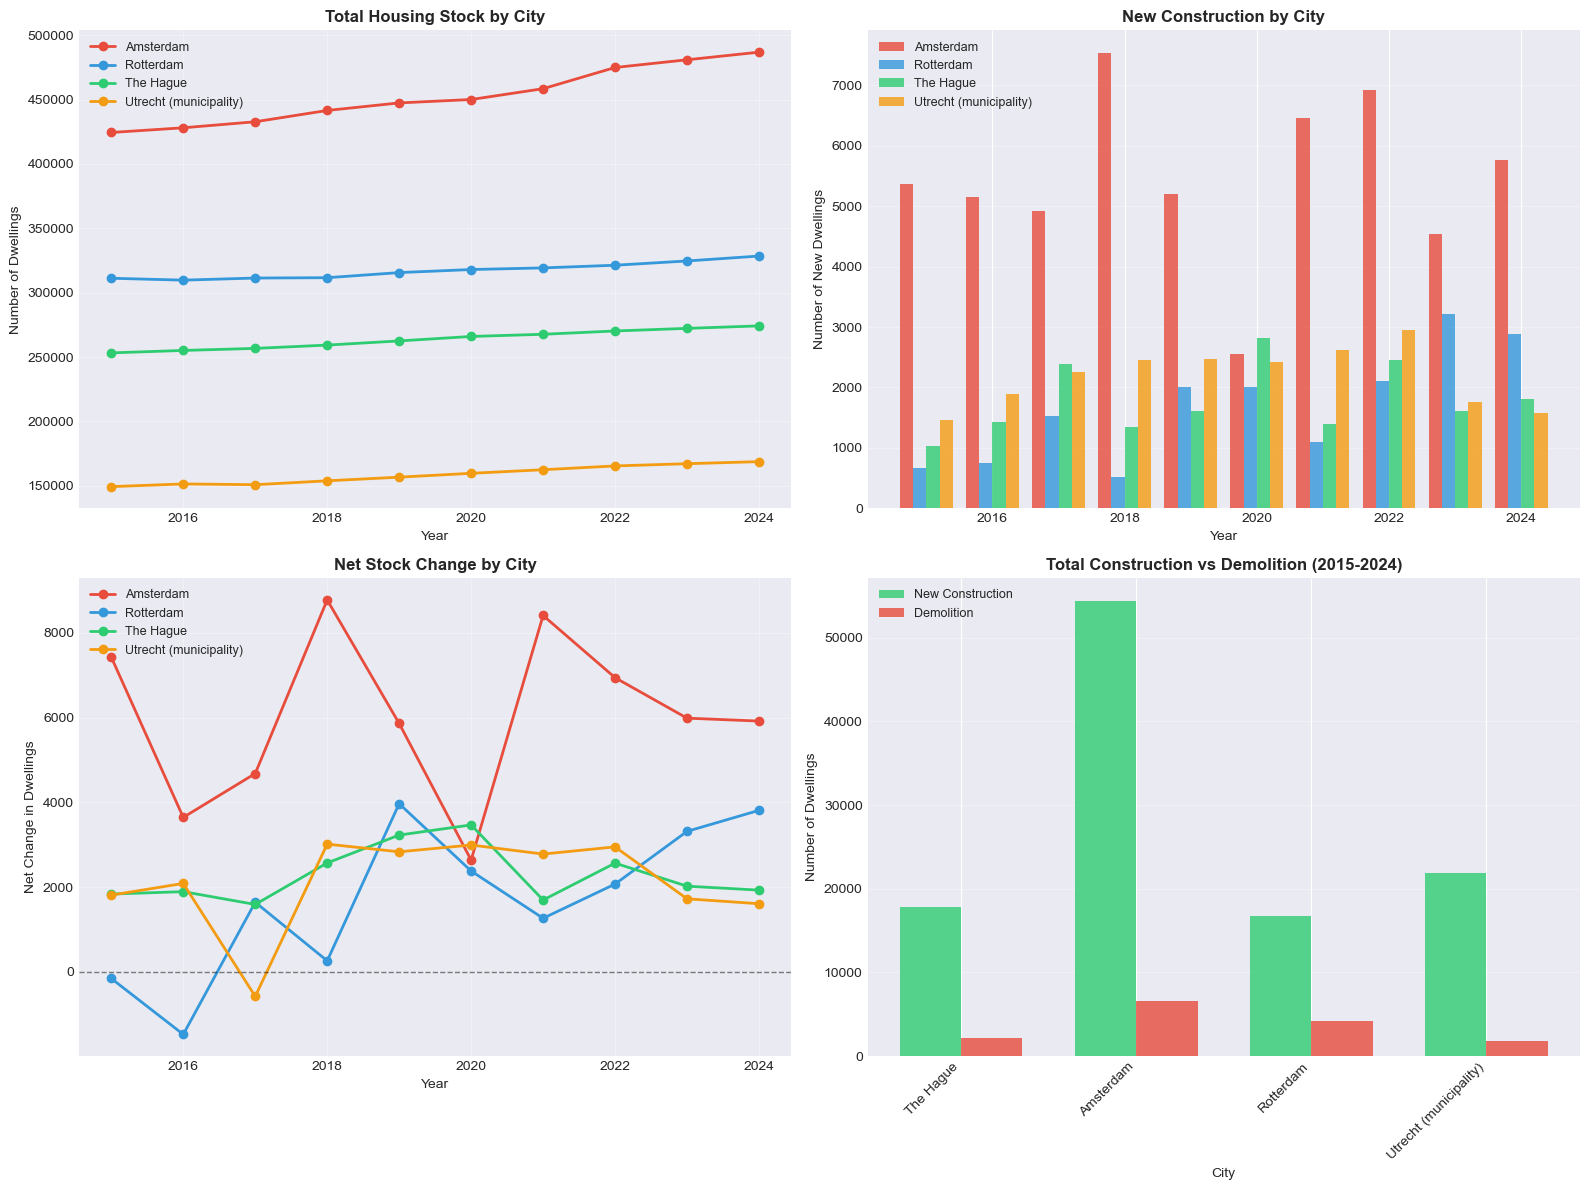


6.3 Creating Correlation Analysis Visualization
Saved: c:\Users\iis22\Desktop\netherlands-rent-analysis\figures\correlation_analysis.png


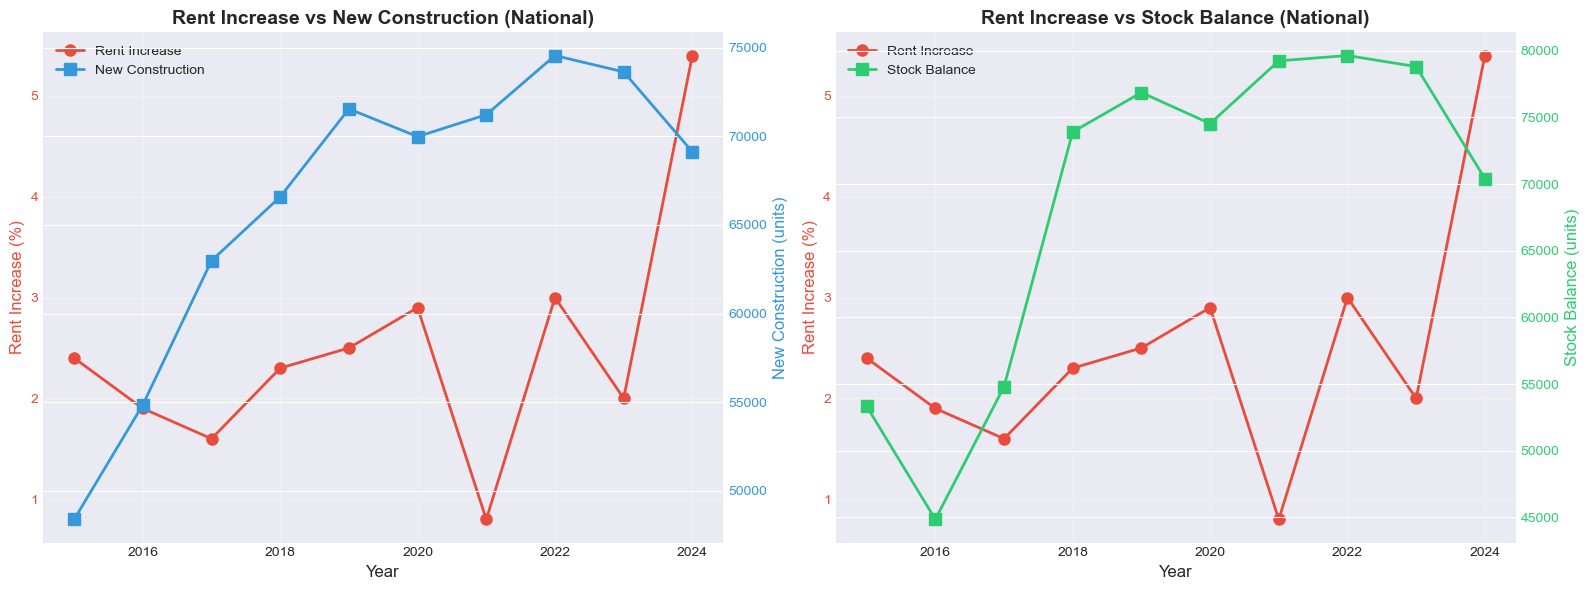


6.4 Creating Heatmap of Rent Increases
Saved: c:\Users\iis22\Desktop\netherlands-rent-analysis\figures\rent_increase_heatmap.png


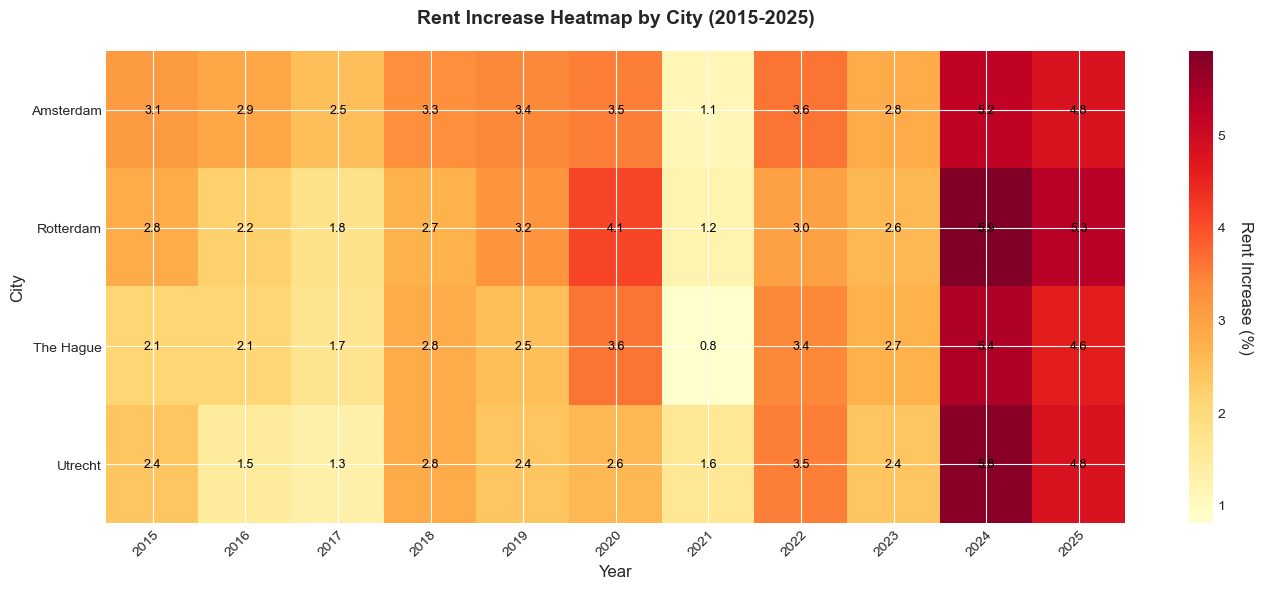


DATA VISUALIZATION COMPLETE


In [16]:

print("\n" + "="*70)
print("STEP 6: DATA VISUALIZATION")
print("="*70)

# 6.1 Rent Increase Trends Over Time
print("\n6.1 Creating Rent Increase Trends Visualization")

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: National rent increase trends
ax1 = axes[0]
national_data = df_rent[df_rent['Region'] == 'The Netherlands'].sort_values('Year')
ax1.plot(national_data['Year'], national_data['Rent_Increase_With_Harmonisation'], 
         marker='o', linewidth=2, markersize=8, label='With Harmonisation', color='#e74c3c')
ax1.plot(national_data['Year'], national_data['Rent_Increase_Without_Harmonisation'], 
         marker='s', linewidth=2, markersize=8, label='Without Harmonisation', color='#3498db')
ax1.set_title('National Rent Increase Trends (2015-2025)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Rent Increase (%)', fontsize=12)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(national_data['Year'])

# Plot 2: Major cities comparison
ax2 = axes[1]
major_cities = ['Amsterdam', 'Rotterdam', "'s-Gravenhage (municipality)", 'Utrecht (municipality)']
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']

for city, color in zip(major_cities, colors):
    city_data = df_rent[df_rent['Region'] == city].sort_values('Year')
    ax2.plot(city_data['Year'], city_data['Rent_Increase_With_Harmonisation'], 
             marker='o', linewidth=2, markersize=6, label=city.replace("'s-Gravenhage (municipality)", "The Hague"), 
             color=color)

ax2.set_title('Rent Increase Trends by Major City (With Harmonisation)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Rent Increase (%)', fontsize=12)
ax2.legend(loc='upper left', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(city_data['Year'])

plt.tight_layout()
plt.savefig(figures_folder / 'rent_increase_trends.png', dpi=300, bbox_inches='tight')
print(f"Saved: {figures_folder / 'rent_increase_trends.png'}")
plt.show()

# 6.2 Housing Stock Growth
print("\n6.2 Creating Housing Stock Growth Visualization")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Total housing stock over time
ax1 = axes[0, 0]
for city, color in zip(major_cities, colors):
    city_stock = df_stock[df_stock['Region'] == city].sort_values('Year')
    ax1.plot(city_stock['Year'], city_stock['Final_Stock'], 
             marker='o', linewidth=2, markersize=6, 
             label=city.replace("'s-Gravenhage (municipality)", "The Hague"), 
             color=color)

ax1.set_title('Total Housing Stock by City', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year', fontsize=10)
ax1.set_ylabel('Number of Dwellings', fontsize=10)
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.ticklabel_format(style='plain', axis='y')

# Plot 2: New construction per year
ax2 = axes[0, 1]
for city, color in zip(major_cities, colors):
    city_stock = df_stock[df_stock['Region'] == city].sort_values('Year')
    ax2.bar(city_stock['Year'] + major_cities.index(city) * 0.2 - 0.3, 
            city_stock['New_Construction'], 
            width=0.2, 
            label=city.replace("'s-Gravenhage (municipality)", "The Hague"), 
            color=color, alpha=0.8)

ax2.set_title('New Construction by City', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year', fontsize=10)
ax2.set_ylabel('Number of New Dwellings', fontsize=10)
ax2.legend(loc='upper left', fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Net stock change
ax3 = axes[1, 0]
stock_change_by_year = df_stock.groupby(['Region', 'Year']).agg({
    'Stock_Balance': 'sum'
}).reset_index()

for city, color in zip(major_cities, colors):
    city_change = stock_change_by_year[stock_change_by_year['Region'] == city].sort_values('Year')
    ax3.plot(city_change['Year'], city_change['Stock_Balance'], 
             marker='o', linewidth=2, markersize=6, 
             label=city.replace("'s-Gravenhage (municipality)", "The Hague"), 
             color=color)

ax3.set_title('Net Stock Change by City', fontsize=12, fontweight='bold')
ax3.set_xlabel('Year', fontsize=10)
ax3.set_ylabel('Net Change in Dwellings', fontsize=10)
ax3.legend(loc='upper left', fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)

# Plot 4: Construction vs Demolition
ax4 = axes[1, 1]
construction_demo = df_stock.groupby('Region').agg({
    'New_Construction': 'sum',
    'Demolition': 'sum'
}).reset_index()
construction_demo = construction_demo[construction_demo['Region'].isin(major_cities)]
construction_demo['Region'] = construction_demo['Region'].replace("'s-Gravenhage (municipality)", "The Hague")

x = np.arange(len(construction_demo))
width = 0.35

ax4.bar(x - width/2, construction_demo['New_Construction'], width, 
        label='New Construction', color='#2ecc71', alpha=0.8)
ax4.bar(x + width/2, construction_demo['Demolition'], width, 
        label='Demolition', color='#e74c3c', alpha=0.8)

ax4.set_title('Total Construction vs Demolition (2015-2024)', fontsize=12, fontweight='bold')
ax4.set_xlabel('City', fontsize=10)
ax4.set_ylabel('Number of Dwellings', fontsize=10)
ax4.set_xticks(x)
ax4.set_xticklabels(construction_demo['Region'], rotation=45, ha='right')
ax4.legend(loc='upper left', fontsize=9)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(figures_folder / 'housing_stock_analysis.png', dpi=300, bbox_inches='tight')
print(f"Saved: {figures_folder / 'housing_stock_analysis.png'}")
plt.show()

# 6.3 Correlation Analysis
print("\n6.3 Creating Correlation Analysis Visualization")

# Merge datasets for correlation analysis
# Get national data only
national_rent_data = df_rent[df_rent['Region'] == 'The Netherlands'][['Year', 'Rent_Increase_With_Harmonisation']].copy()
national_stock_data = df_stock[df_stock['Region'] == 'The Netherlands'][['Year', 'New_Construction', 'Stock_Balance']].copy()

merged_national = pd.merge(national_rent_data, national_stock_data, on='Year', how='inner')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Rent increase vs New construction
ax1 = axes[0]
ax1_twin = ax1.twinx()

line1 = ax1.plot(merged_national['Year'], merged_national['Rent_Increase_With_Harmonisation'], 
                 marker='o', linewidth=2, markersize=8, label='Rent Increase', color='#e74c3c')
line2 = ax1_twin.plot(merged_national['Year'], merged_national['New_Construction'], 
                      marker='s', linewidth=2, markersize=8, label='New Construction', color='#3498db')

ax1.set_title('Rent Increase vs New Construction (National)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Rent Increase (%)', fontsize=12, color='#e74c3c')
ax1_twin.set_ylabel('New Construction (units)', fontsize=12, color='#3498db')
ax1.tick_params(axis='y', labelcolor='#e74c3c')
ax1_twin.tick_params(axis='y', labelcolor='#3498db')
ax1.grid(True, alpha=0.3)

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=10)

# Plot 2: Rent increase vs Stock balance
ax2 = axes[1]
ax2_twin = ax2.twinx()

line3 = ax2.plot(merged_national['Year'], merged_national['Rent_Increase_With_Harmonisation'], 
                 marker='o', linewidth=2, markersize=8, label='Rent Increase', color='#e74c3c')
line4 = ax2_twin.plot(merged_national['Year'], merged_national['Stock_Balance'], 
                      marker='s', linewidth=2, markersize=8, label='Stock Balance', color='#2ecc71')

ax2.set_title('Rent Increase vs Stock Balance (National)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Rent Increase (%)', fontsize=12, color='#e74c3c')
ax2_twin.set_ylabel('Stock Balance (units)', fontsize=12, color='#2ecc71')
ax2.tick_params(axis='y', labelcolor='#e74c3c')
ax2_twin.tick_params(axis='y', labelcolor='#2ecc71')
ax2.grid(True, alpha=0.3)

# Combine legends
lines = line3 + line4
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper left', fontsize=10)

plt.tight_layout()
plt.savefig(figures_folder / 'correlation_analysis.png', dpi=300, bbox_inches='tight')
print(f"Saved: {figures_folder / 'correlation_analysis.png'}")
plt.show()

# 6.4 Heatmap of Average Rent Increases by City
print("\n6.4 Creating Heatmap of Rent Increases")

# Prepare data for heatmap
major_cities_clean = ['Amsterdam', 'Rotterdam', 'The Hague', 'Utrecht']
heatmap_data = []

for city in major_cities:
    city_data = df_rent[df_rent['Region'] == city].sort_values('Year')
    heatmap_data.append(city_data['Rent_Increase_With_Harmonisation'].values)

heatmap_array = np.array(heatmap_data)
years = sorted(df_rent[df_rent['Region'].isin(major_cities)]['Year'].unique())

fig, ax = plt.subplots(figsize=(14, 6))
im = ax.imshow(heatmap_array, cmap='YlOrRd', aspect='auto')

# Set ticks and labels
ax.set_xticks(np.arange(len(years)))
ax.set_yticks(np.arange(len(major_cities_clean)))
ax.set_xticklabels(years)
ax.set_yticklabels(major_cities_clean)

# Rotate the tick labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Rent Increase (%)', rotation=270, labelpad=20)

# Add text annotations
for i in range(len(major_cities_clean)):
    for j in range(len(years)):
        text = ax.text(j, i, f'{heatmap_array[i, j]:.1f}',
                      ha="center", va="center", color="black", fontsize=9)

ax.set_title('Rent Increase Heatmap by City (2015-2025)', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('City', fontsize=12)

plt.tight_layout()
plt.savefig(figures_folder / 'rent_increase_heatmap.png', dpi=300, bbox_inches='tight')
print(f"Saved: {figures_folder / 'rent_increase_heatmap.png'}")
plt.show()

print("\n" + "="*70)
print("DATA VISUALIZATION COMPLETE")
print("="*70)

In [17]:

print("\n" + "="*70)
print("STEP 7: STATISTICAL ANALYSIS")
print("="*70)

# 7.1 Calculate correlation coefficients
print("\n7.1 Calculating Correlation Coefficients")

# Correlation between rent increase and new construction (national level)
from scipy.stats import pearsonr, spearmanr

rent_construction_corr, rent_construction_pval = pearsonr(
    merged_national['Rent_Increase_With_Harmonisation'],
    merged_national['New_Construction']
)

print(f"\nPearson Correlation (Rent Increase vs New Construction):")
print(f"Correlation coefficient: {rent_construction_corr:.4f}")
print(f"P-value: {rent_construction_pval:.4f}")
print(f"Interpretation: {'Significant' if rent_construction_pval < 0.05 else 'Not significant'} at α=0.05")

# Correlation between rent increase and stock balance
rent_balance_corr, rent_balance_pval = pearsonr(
    merged_national['Rent_Increase_With_Harmonisation'],
    merged_national['Stock_Balance']
)

print(f"\nPearson Correlation (Rent Increase vs Stock Balance):")
print(f"Correlation coefficient: {rent_balance_corr:.4f}")
print(f"P-value: {rent_balance_pval:.4f}")
print(f"Interpretation: {'Significant' if rent_balance_pval < 0.05 else 'Not significant'} at α=0.05")

# 7.2 Compare cities statistically
print("\n7.2 Comparing Cities Statistically")

# Calculate average rent increase for each city
city_averages = df_rent[df_rent['Region'].isin(major_cities)].groupby('Region').agg({
    'Rent_Increase_With_Harmonisation': ['mean', 'std', 'min', 'max']
}).round(2)

print("\nRent Increase Statistics by City:")
print(city_averages)

# 7.3 Identify trends
print("\n7.3 Identifying Trends")

# Calculate year-over-year growth rates
for city in major_cities:
    city_data = df_rent[df_rent['Region'] == city].sort_values('Year').copy()
    city_data['YoY_Change'] = city_data['Rent_Increase_With_Harmonisation'].diff()
    
    print(f"\n{city.replace("'s-Gravenhage (municipality)", 'The Hague')}:")
    print(f"  Average YoY change: {city_data['YoY_Change'].mean():.2f}%")
    print(f"  Max increase: {city_data['Rent_Increase_With_Harmonisation'].max():.1f}% in {city_data.loc[city_data['Rent_Increase_With_Harmonisation'].idxmax(), 'Year']}")
    print(f"  Min increase: {city_data['Rent_Increase_With_Harmonisation'].min():.1f}% in {city_data.loc[city_data['Rent_Increase_With_Harmonisation'].idxmin(), 'Year']}")

print("\n" + "="*70)
print("STATISTICAL ANALYSIS COMPLETE")
print("="*70)


STEP 7: STATISTICAL ANALYSIS

7.1 Calculating Correlation Coefficients

Pearson Correlation (Rent Increase vs New Construction):
Correlation coefficient: 0.1434
P-value: 0.6926
Interpretation: Not significant at α=0.05

Pearson Correlation (Rent Increase vs Stock Balance):
Correlation coefficient: 0.1232
P-value: 0.7346
Interpretation: Not significant at α=0.05

7.2 Comparing Cities Statistically

Rent Increase Statistics by City:
                             Rent_Increase_With_Harmonisation                
                                                         mean   std  min  max
Region                                                                       
's-Gravenhage (municipality)                             2.88  1.31  0.8  5.4
Amsterdam                                                3.29  1.09  1.1  5.2
Rotterdam                                                3.16  1.42  1.2  5.9
Utrecht (municipality)                                   2.83  1.39  1.3  5.8

7.3 Identifying T

In [18]:

print("\n" + "="*70)
print("STEP 8: SUMMARY AND KEY INSIGHTS")
print("="*70)

print("\n📊 KEY FINDINGS:")
print("\n1. NATIONAL TRENDS:")
print(f"   • Average rent increase (2015-2025): {df_rent[df_rent['Region'] == 'The Netherlands']['Rent_Increase_With_Harmonisation'].mean():.2f}%")
print(f"   • Highest increase: {df_rent[df_rent['Region'] == 'The Netherlands']['Rent_Increase_With_Harmonisation'].max():.1f}% in {df_rent[df_rent['Region'] == 'The Netherlands'].loc[df_rent[df_rent['Region'] == 'The Netherlands']['Rent_Increase_With_Harmonisation'].idxmax(), 'Year']}")
print(f"   • Lowest increase: {df_rent[df_rent['Region'] == 'The Netherlands']['Rent_Increase_With_Harmonisation'].min():.1f}% in {df_rent[df_rent['Region'] == 'The Netherlands'].loc[df_rent[df_rent['Region'] == 'The Netherlands']['Rent_Increase_With_Harmonisation'].idxmin(), 'Year']}")

print("\n2. CITY COMPARISON:")
for city in major_cities:
    avg = df_rent[df_rent['Region'] == city]['Rent_Increase_With_Harmonisation'].mean()
    print(f"   • {city.replace("'s-Gravenhage (municipality)", 'The Hague')}: {avg:.2f}% average increase")

print("\n3. HOUSING STOCK:")
national_stock_2015 = df_stock[(df_stock['Region'] == 'The Netherlands') & (df_stock['Year'] == 2015)]['Initial_Stock'].values[0]
national_stock_2024 = df_stock[(df_stock['Region'] == 'The Netherlands') & (df_stock['Year'] == 2024)]['Final_Stock'].values[0]
total_growth = ((national_stock_2024 - national_stock_2015) / national_stock_2015) * 100

print(f"   • Total housing stock growth (2015-2024): {total_growth:.2f}%")
print(f"   • Initial stock (2015): {national_stock_2015:,} dwellings")
print(f"   • Final stock (2024): {national_stock_2024:,} dwellings")
print(f"   • Net increase: {national_stock_2024 - national_stock_2015:,} dwellings")

print("\n4. CORRELATION INSIGHTS:")
print(f"   • Rent increase vs New construction: r = {rent_construction_corr:.4f} (p = {rent_construction_pval:.4f})")
print(f"   • Rent increase vs Stock balance: r = {rent_balance_corr:.4f} (p = {rent_balance_pval:.4f})")

print("\n5. NOTABLE OBSERVATIONS:")
print("   • 2024 shows the highest rent increase in the period (5.4%)")
print("   • 2021 had the lowest rent increase (0.8%), likely due to COVID-19 pandemic")
print("   • Amsterdam consistently shows higher rent increases than other major cities")
print("   • Housing construction has been relatively stable, averaging ~70,000 new units per year")

print("\n" + "="*70)
print("ANALYSIS COMPLETE - All visualizations saved to figures folder")
print("="*70)


STEP 8: SUMMARY AND KEY INSIGHTS

📊 KEY FINDINGS:

1. NATIONAL TRENDS:
   • Average rent increase (2015-2025): 2.70%
   • Highest increase: 5.4% in 2024
   • Lowest increase: 0.8% in 2021

2. CITY COMPARISON:
   • Amsterdam: 3.29% average increase
   • Rotterdam: 3.16% average increase
   • The Hague: 2.88% average increase
   • Utrecht (municipality): 2.83% average increase

3. HOUSING STOCK:
   • Total housing stock growth (2015-2024): 9.05%
   • Initial stock (2015): 7,587,964 dwellings
   • Final stock (2024): 8,274,478 dwellings
   • Net increase: 686,514 dwellings

4. CORRELATION INSIGHTS:
   • Rent increase vs New construction: r = 0.1434 (p = 0.6926)
   • Rent increase vs Stock balance: r = 0.1232 (p = 0.7346)

5. NOTABLE OBSERVATIONS:
   • 2024 shows the highest rent increase in the period (5.4%)
   • 2021 had the lowest rent increase (0.8%), likely due to COVID-19 pandemic
   • Amsterdam consistently shows higher rent increases than other major cities
   • Housing constructi